# Start

In [1]:
from os.path import join
import numpy as np
import pandas as pd
from make_dataset import make_dataset
from sklearn.metrics import mean_absolute_error
import torch
import torch.nn as nn
import torch.optim as optim

In [108]:
path = '\\Users\\ineeji\\Desktop\\새 폴더\\Ineeji\\datas\\데이터합본_파생변수 제거.csv'
train_x, train_y, test_x, test_y = make_dataset(path)
train_x = train_x.filter(regex='TI')
test_x = test_x.filter(regex='TI')

print(train_x.columns)
#train_x = train_x['FIC23105(P/A RT Flow)']
#test_x = test_x['FIC23105(P/A RT Flow)']
#train_x = pd.DataFrame(train_x)
#test_x = pd.DataFrame(test_x)


=============complete=============
Index(['TIC23115(Feed1 T)', 'TI23029(Feed2 T)', 'TI23120(F Zone T)',
       'TI23121(SS T)', 'TI23123(Reflux T)', 'TI23502(D/O Vapor T)',
       'TI23122(BTM T)', 'TI23116(Top T)', 'TI23117(DSL S Vapor T)',
       'TI23119(OV T)', 'TI23118(D/O Liquid T)', 'TI23028(P/A RT T)',
       'TI21022A(Catalyst T 1)', 'TI21022B(Catalyst T 2)'],
      dtype='object')


In [84]:
train = pd.concat([train_x,train_y],axis=1)
dl = train.corr()['DSL D-95'].dropna().map(abs).sort_values(ascending = False)[1:]
dl = dl[6:]
dl = pd.DataFrame(dl)
dl = dl.reset_index()
dl = dl['index']
train_x.drop(dl,axis=1,inplace=True)
test_x.drop(dl,axis=1,inplace=True)

In [35]:
train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
test_x.drop(['Unnamed: 0'],axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
train_y = np.log(train_y)
test_y = np.log(test_y)
test_y

0      5.98946254443730907724
1      5.98141421125448058405
2      5.98191913426445065483
3      5.99096442206630008798
4      5.99396142730656933395
                ...          
872    5.90971204523572257727
873    5.91188006776513930163
874    5.91025449168243888209
875    5.90372563279997475405
876    5.89715386763674054293
Name: DSL D-95, Length: 877, dtype: float64

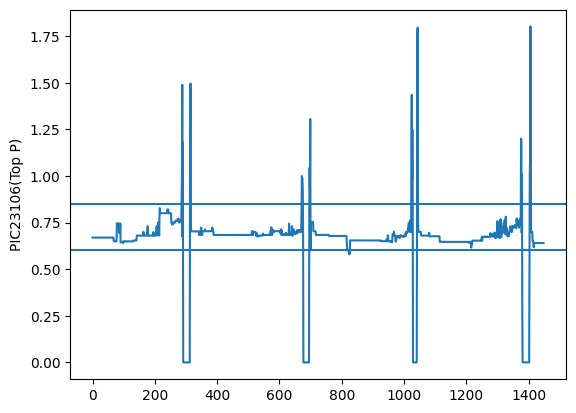

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(train_x['PIC23106(Top P)'])
plt.axhline(0.6)
plt.axhline(0.85)

<Axes: >

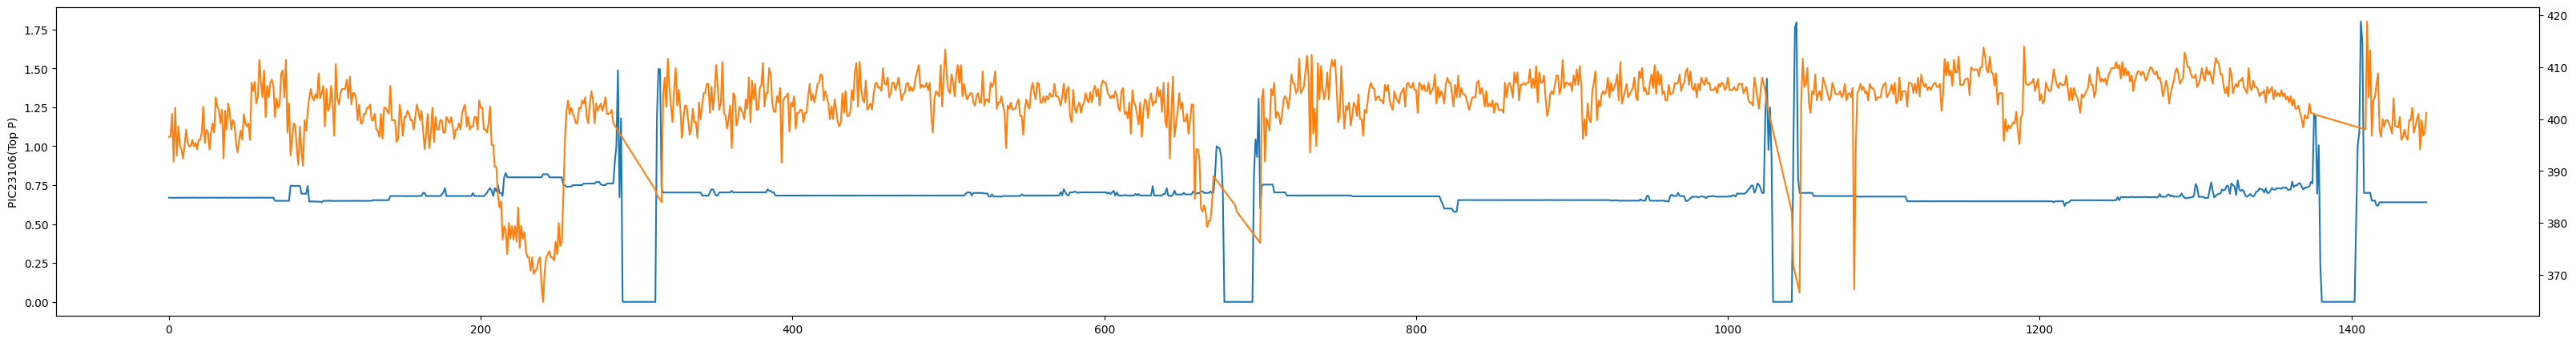

In [ ]:
train_y.describe()
plt.figure(figsize=(40, 5))
sns.lineplot(train_x['PIC23106(Top P)'])
plt.twinx()
train_y.plot(color='C1')

<Axes: >

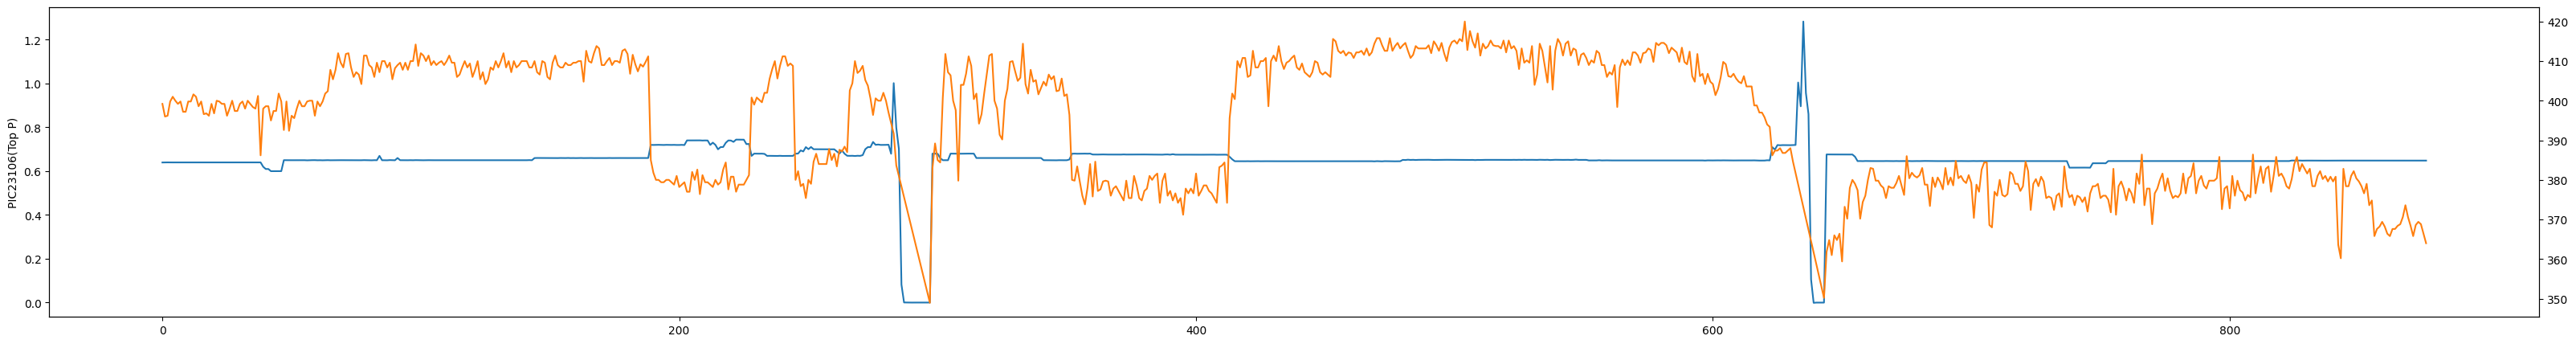

In [ ]:
train_y.describe()
plt.figure(figsize=(40, 5))
sns.lineplot(test_x['PIC23106(Top P)'])
plt.twinx()
test_y.plot(color='C1')

In [ ]:
train_x

PIC23106(Top P)     FIC23105(P/A RT Flow)  \
0     0.66949999999999998401  324.95240000000001145963   
1     0.66859999999999997211  325.03019999999997935447   
2     0.66879999999999995008  329.89789999999999281499   
3     0.66939999999999999503  330.00940000000002783054   
4     0.66949999999999998401  330.02480000000002746674   
...                      ...                       ...   
1444  0.64000000000000001332  284.94850000000002410161   
1445  0.63990000000000002434  284.98110000000002628440   
1446  0.63970000000000004636  285.00959999999997762643   
1447  0.63990000000000002434  284.99200000000001864464   
1448  0.63990000000000002434  297.23770000000001800800   

                           A+B     TI23118(D/O Liquid T)  \
0     750.63670000000001891749  244.48810000000000286491   
1     750.43290000000001782610  248.46530000000001336957   
2     751.32539999999994506652  243.68600000000000704858   
3     751.13310000000001309672  241.97440000000000281943   
4     751.09590000000002874003  243.90270000000001004992   
...                        ...                       ...   
1444  737.76319999999998344720  230.31229999999999336069   
1445  738.33400000000006002665  230.93010000000001014087   
1446  738.90840000000002874003  228.69569999999998799467   
1447  738.83169999999995525286  229.22300000000001318767   
1448  738.40840000000002874003  228.84680000000000177351   

          TI23502(D/O Vapor T)  
0     305.36910000000000309228  
1     317.27920000000000300133  
2     303.54250000000001818989  
3     299.93520000000000891305  
4     302.28379999999998517524  
...                        ...  
1444  301.35820000000001073204  
1445  299.52719999999999345164  
1446  295.12069999999999936335  
1447  300.44869999999997389750  
1448  299.27989999999999781721  

[1449 rows x 5 columns]

<Axes: >

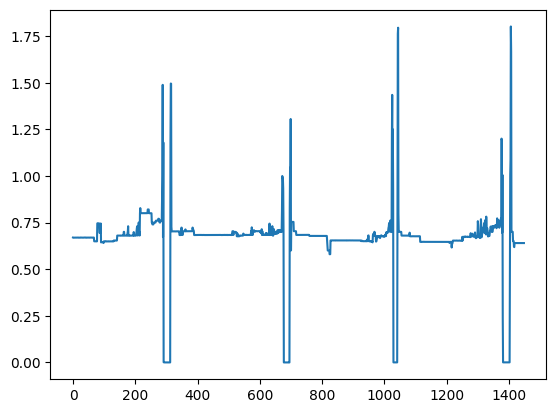

In [ ]:
train_x['PIC23106(Top P)'].plot()

In [ ]:
arr = train_x[(train_x['PIC23106(Top P)'] > 0.9) | (train_x['PIC23106(Top P)'] < 0.5)].index
train_x.drop(arr,axis=0,inplace=True)
train_y.drop(arr,axis=0,inplace=True)

# Modeling

### Linear Regression

In [ ]:
import torch
import torch.nn as nn

class MyLinear(nn.Module):
    def __init__(self):
        super(MyLinear, self).__init__()
        self.linear = nn.Linear(5, 1, bias=True)
        #self.dropout = nn.Dropout(p=0.5)
        #nn.init.xavier_uniform_(self.linear.weight)
        
        # 직접 가중치를 설정
        #self.linear.weight = nn.Parameter(torch.tensor([-63.776, -0.0062, -0.065, 0.355, 0.424], dtype=torch.float).view(1, -1))
        #self.linear.bias = nn.Parameter(torch.tensor([274], dtype=torch.float))
        
    def forward(self, x):
        out = self.linear(x)
        return out

import torch.optim as optim

# 모델 인스턴스 생성
model = MyLinear()

# 손실 함수 정의
criterion = nn.MSELoss()
#weight_decay = 0.00001
# 최적화 함수 정의
optimizer = optim.Adam(model.parameters(), lr=0.1)

a = train_x.values
a = torch.Tensor(a)
b = train_y.values
b = torch.Tensor(b)

# 모델 학습
for epoch in range(10000):
    optimizer.zero_grad()  # 기울기 초기화
    
    outputs = model(a)  # 순전파
    loss = criterion(outputs, b)  # 손실 계산
    
    loss.backward()  # 역전파
    
    optimizer.step()  # 매개변수 업데이트
    if epoch % 100 == 0:
        print('Epoch {}, Loss: {}'.format(epoch, loss.item()))
x2 = test_x.values
x2 = torch.Tensor(x2)
with torch.no_grad():
    y_pred = model(x2)

score = mean_absolute_error(test_y,y_pred)
score

c:\Users\ineeji\anaconda3\envs\torch_1\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1449])) that is different to the input size (torch.Size([1449, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 241120.578125
Epoch 100, Loss: 9063.00390625
Epoch 200, Loss: 8857.125
Epoch 300, Loss: 8655.1669921875
Epoch 400, Loss: 8428.4833984375
Epoch 500, Loss: 8185.03564453125
Epoch 600, Loss: 7930.1728515625
Epoch 700, Loss: 7667.5146484375
Epoch 800, Loss: 7399.61083984375
Epoch 900, Loss: 7128.38623046875
Epoch 1000, Loss: 6855.40673828125
Epoch 1100, Loss: 6582.029296875
Epoch 1200, Loss: 6309.478515625
Epoch 1300, Loss: 6038.86767578125
Epoch 1400, Loss: 5771.20263671875
Epoch 1500, Loss: 5507.3837890625
Epoch 1600, Loss: 5248.19775390625
Epoch 1700, Loss: 4994.32568359375
Epoch 1800, Loss: 4746.3427734375
Epoch 1900, Loss: 4504.72998046875
Epoch 2000, Loss: 4269.8837890625
Epoch 2100, Loss: 4042.127685546875
Epoch 2200, Loss: 3821.709228515625
Epoch 2300, Loss: 3608.81884765625
Epoch 2400, Loss: 3403.591796875
Epoch 2500, Loss: 3206.1162109375
Epoch 2600, Loss: 3016.432373046875
Epoch 2700, Loss: 2834.54296875
Epoch 2800, Loss: 2660.417724609375
Epoch 2900, Loss: 2493.9

17.883438114332115

In [ ]:
y_pred

tensor([[401.4252],
        [401.4430],
        [401.4419],
        [401.4388],
        [401.4017],
        [401.3687],
        [401.4268],
        [401.4277],
        [401.4596],
        [401.4614],
        [401.4840],
        [401.4854],
        [401.4783],
        [401.4529],
        [401.4724],
        [401.4948],
        [401.5017],
        [401.4661],
        [401.4629],
        [401.4729],
        [401.4546],
        [401.4714],
        [401.5130],
        [401.4664],
        [401.4856],
        [401.4948],
        [401.4688],
        [401.4814],
        [401.4765],
        [401.5147],
        [401.4932],
        [401.5202],
        [401.5137],
        [401.5090],
        [401.5255],
        [401.5186],
        [401.5106],
        [401.5093],
        [401.1904],
        [400.8292],
        [400.8212],
        [400.8221],
        [400.7438],
        [400.8194],
        [400.8191],
        [400.7728],
        [400.7692],
        [401.1907],
        [401.4652],
        [401.6160],


In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 1.1953e+02, -5.5619e-02,  1.6736e-01,  4.2789e-01, -4.2378e-02]])),
             ('linear.bias', tensor([125.1840]))])

### Linear Regression_가중치 고정

In [ ]:
import torch
import torch.nn as nn

class MyLinear(nn.Module):
    def __init__(self):
        super(MyLinear, self).__init__()
        #self.linear = nn.Linear(5, 1, bias=True)
        #self.dropout = nn.Dropout(p=0.5)
        #nn.init.xavier_uniform_(self.linear.weight)
        
        # 직접 가중치를 설정
        self.linear.weight = nn.Parameter(torch.tensor([-63.776, -0.0062, -0.065, 0.355, 0.424], dtype=torch.float).view(1, -1))
        #self.linear.bias = nn.Parameter(torch.tensor([274], dtype=torch.float))
        
    def forward(self, x):
        out = self.linear(x)
        return out

import torch.optim as optim

# 모델 인스턴스 생성
model = MyLinear()

# 손실 함수 정의
criterion = nn.MSELoss()
#weight_decay = 0.00001
# 최적화 함수 정의
optimizer = optim.Adam(model.parameters(), lr=0.1)

a = train_x.values
a = torch.Tensor(a)
b = train_y.values
b = torch.Tensor(b)

# 모델 학습
for epoch in range(10000):
    optimizer.zero_grad()  # 기울기 초기화
    
    outputs = model(a)  # 순전파
    loss = criterion(outputs, b)  # 손실 계산
    
    loss.backward()  # 역전파
    
    optimizer.step()  # 매개변수 업데이트
    if epoch % 100 == 0:
        print('Epoch {}, Loss: {}'.format(epoch, loss.item()))
x2 = test_x.values
x2 = torch.Tensor(x2)
with torch.no_grad():
    y_pred = model(x2)

score = mean_absolute_error(test_y,y_pred)
score

In [ ]:
pd.DataFrame(y_pred).describe()

0
count  920.00000000000000000000
mean   401.60363769531250000000
std      1.14717543125152587891
min    398.01483154296875000000
25%    401.53315734863281250000
50%    401.64558410644531250000
75%    401.76345825195312500000
max    413.16207885742187500000

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
y_pred = y_pred.detach().numpy()
y_pred = pd.DataFrame(y_pred)

In [ ]:
pred1 = pd.DataFrame(pred1)

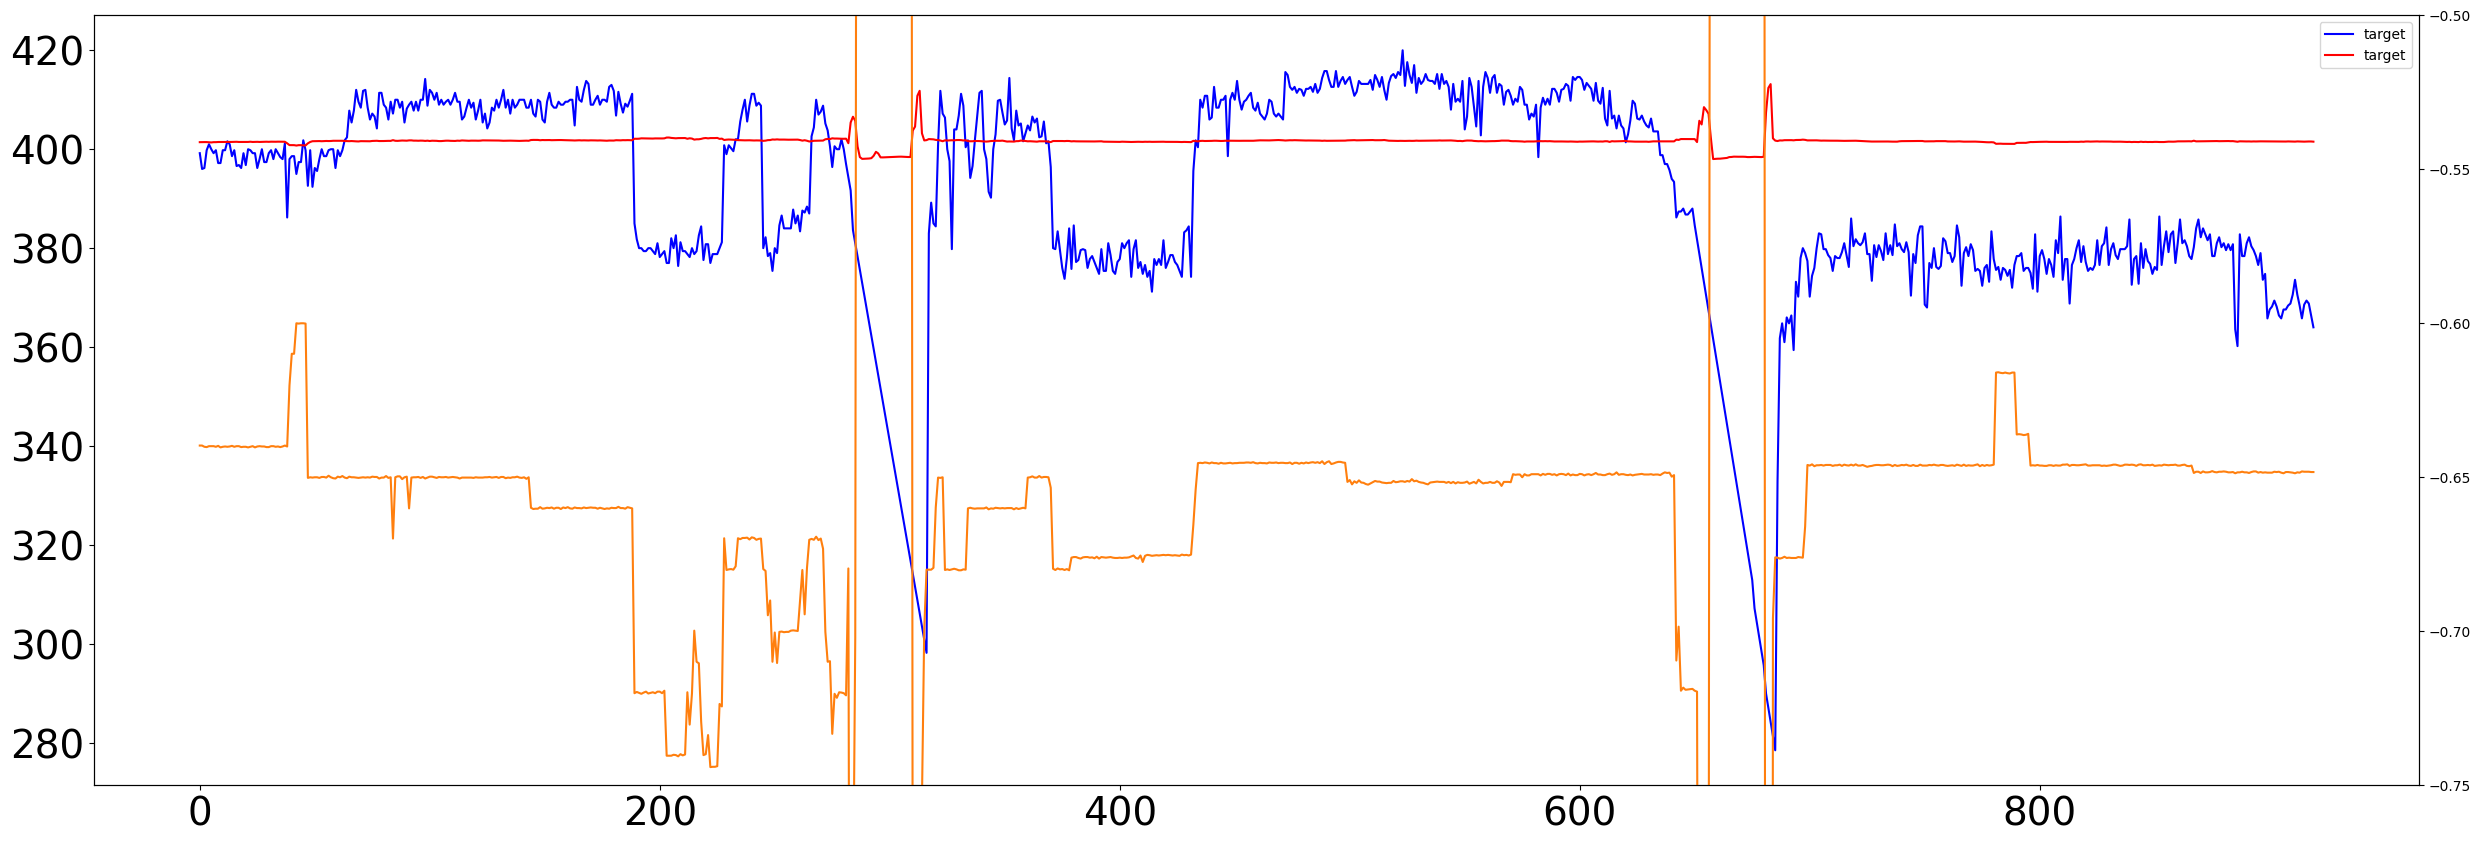

In [ ]:
import matplotlib.pyplot as plt
#output = output.detach().numpy()
#output = pd.DataFrame(output)
target_1 = test_y
target_2 = y_pred
target_1.describe()
target_2.describe()
plt.figure(figsize=(30,10))
plt.plot(target_1, label='target', color = 'b')
plt.plot(target_2, label='target', color = 'r')
plt.legend()
plt.xticks(fontsize=28)
plt.yticks(fontsize=28) 
plt.twinx()
plt.plot(-test_x.iloc[:,0], color='C1')
plt.ylim([-0.75, -0.5])
plt.show()

In [ ]:
test_x

PIC23106(Top P)     FIC23105(P/A RT Flow)  \
0    0.63970000000000004636  299.97509999999999763531   
1    0.63970000000000004636  299.99279999999998835847   
2    0.64010000000000000231  299.97000000000002728484   
3    0.64019999999999999130  299.96609999999998308340   
4    0.63990000000000002434  295.62619999999998299245   
..                      ...                       ...   
915  0.64819999999999999840  469.80360000000001718945   
916  0.64819999999999999840  470.28789999999997917257   
917  0.64819999999999999840  476.24610000000001264198   
918  0.64829999999999998739  474.99439999999998462954   
919  0.64829999999999998739  475.09320000000002437446   

                          A+B     TI23118(D/O Liquid T)  \
0    739.05619999999998981366  229.75280000000000768523   
1    739.81780000000003383320  230.18739999999999668034   
2    740.18360000000006948540  231.23730000000000472937   
3    739.88930000000004838512  232.17549999999999954525   
4    741.02219999999999799911  232.83289999999999508873   
..                        ...                       ...   
915  783.35899999999992360245  230.39140000000000441105   
916  783.56060000000002219167  231.64289999999999736247   
917  785.62699999999995270628  231.76609999999999445208   
918  785.93450000000007094059  231.46920000000000072760   
919  786.03819999999996070983  229.66990000000001259650   

         TI23502(D/O Vapor T)  
0    296.87340000000000372893  
1    295.07699999999999818101  
2    298.90499999999997271516  
3    303.09809999999998808562  
4    307.21890000000001919034  
..                        ...  
915  292.11770000000001346052  
916  293.32100000000002637535  
917  291.40870000000001027729  
918  290.09230000000002291927  
919  288.36000000000001364242  

[920 rows x 5 columns]

### TabNet-B

In [109]:
!pip install pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetRegressor

In [110]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = TabNetRegressor(n_d=8, n_a=8, n_steps=4, gamma=1.3, lambda_sparse=0, optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr=2e-2), mask_type='entmax', device_name=device)
model.fit( X_train=train_x.to_numpy(), y_train=train_y.to_numpy().reshape(-1,1), eval_set=[(train_x.to_numpy(), train_y.to_numpy().reshape(-1,1)), (test_x.to_numpy(), test_y.to_numpy().reshape(-1,1))],max_epochs=1000, patience=100)
test_x_np = test_x.values
y_pred = model.predict(test_x_np)
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,y_pred)
score

c:\Users\ineeji\anaconda3\envs\torch_1\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 155595.33286| val_0_mse: 74364.67595| val_1_mse: 71759.78658|  0:00:07s
epoch 1  | loss: 114562.5464| val_0_mse: 79606.74281| val_1_mse: 64169.03328|  0:00:11s
epoch 2  | loss: 32209.51963| val_0_mse: 168118.96489| val_1_mse: 177660.40286|  0:00:15s
epoch 3  | loss: 577.16535| val_0_mse: 4103.81979| val_1_mse: 4296.03303|  0:00:18s
epoch 4  | loss: 91.21414| val_0_mse: 6019.54545| val_1_mse: 6374.45378|  0:00:22s
epoch 5  | loss: 57.36559| val_0_mse: 5237.29809| val_1_mse: 5734.26476|  0:00:25s
epoch 6  | loss: 32.76937| val_0_mse: 2167.41053| val_1_mse: 2332.64409|  0:00:29s
epoch 7  | loss: 28.66661| val_0_mse: 686.75298| val_1_mse: 793.29629|  0:00:33s
epoch 8  | loss: 25.52452| val_0_mse: 387.6794| val_1_mse: 520.89878|  0:00:37s
epoch 9  | loss: 24.45052| val_0_mse: 183.40847| val_1_mse: 299.84092|  0:00:40s
epoch 10 | loss: 27.86715| val_0_mse: 42.94328| val_1_mse: 162.51883|  0:00:44s
epoch 11 | loss: 22.89945| val_0_mse: 46.41272| val_1_mse: 119.64713|  0:00:48

### pycaret

In [8]:
from pycaret.regression import *

In [26]:
train_xy = pd.concat([train_x,train_y],axis=1)
test_xy = pd.concat([test_x,test_y],axis=1)
setup(data=train_xy,target = 'DSL D-95', test_data = test_xy,preprocess= False)

In [27]:
bm = compare_models(sort = 'mae')

In [24]:
cm = create_model('xgboost')

In [29]:
y_pred = predict_model(bm, data = test_x)
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,y_pred['prediction_label'])
score

9.029683267092839

### AutoGluon

In [30]:
!pip install AutoGluon

In [31]:
train_xy = pd.concat([train_x,train_y],axis=1)
train_xy = train_xy.reset_index()
train_xy

index        FIC21192(F2 Flow)      TI23502(D/O Vapor T)  \
0          0  50.34759999999999990905  303.47390000000001464286   
1          1  50.85819999999999652118  305.32299999999997908162   
2          2  49.58670000000000044338  305.32069999999998799467   
3          3  50.79829999999999756710  306.27050000000002683009   
4          4  51.11610000000000297860  306.64049999999997453415   
...      ...                      ...                       ...   
34729  34736  44.63069999999999737383  299.69439999999997326086   
34730  34737  44.74779999999999802185  300.57019999999999981810   
34731  34738  44.55389999999999872671  299.66309999999998581188   
34732  34739  44.43480000000000273985  299.52219999999999799911   
34733  34740  44.71759999999999735110  297.49340000000000827640   

             FIC23010(D/O Flow)   FIC25103(OVHD Flow 1)  \
0      105.83039999999999736247  1.94950000000000001066   
1      107.12770000000000436557  2.00629999999999997229   
2      107.36400000000000432010  1.96140000000000003233   
3      108.16249999999999431566  1.87919999999999998153   
4      107.55159999999999342890  1.92769999999999996909   
...                         ...                     ...   
34729   85.95980000000000131877  1.83129999999999992788   
34730   86.09390000000000497948  1.82390000000000007674   
34731   85.41400000000000147793  1.84000000000000007994   
34732   85.00320000000000675300  1.82220000000000004192   
34733   84.65349999999999397460  1.79190000000000004832   

             FIC23133(R/D Flow)    FIC23110(OVHD Flow 2)  \
0       98.20359999999999445208   9.97279999999999944293   
1       99.56189999999999429292  10.94740000000000001990   
2       99.78789999999999338343   8.72000000000000063949   
3      102.29019999999999868123  10.73739999999999916724   
4      102.61730000000000018190  10.02500000000000035527   
...                         ...                      ...   
34729   83.72759999999999536158  10.71030000000000015348   
34730   84.11820000000000163709  11.21759999999999912745   
34731   83.67359999999999331521  11.06659999999999932641   
34732   83.41479999999999961346  10.78470000000000084128   
34733   82.63120000000000686668  11.10510000000000019327   

                       DSL D-95  
0      396.60000000000002273737  
1      396.60000000000002273737  
2      396.60000000000002273737  
3      396.60000000000002273737  
4      396.60000000000002273737  
...                         ...  
34729  400.19999999999998863132  
34730  400.12000000000000454747  
34731  400.02999999999997271516  
34732  399.94999999999998863132  
34733  399.87000000000000454747  

[34734 rows x 8 columns]

In [35]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score  
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, train_test_split

train_xy = pd.concat([train_x,train_y],axis=1)
#train_xy = train_xy.reset_index()
train_data = TabularDataset(train_xy)
test_data = TabularDataset(test_x)
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
print("==================Tabular_complete========================")
#그룹을 프로덕트 코드로 하면 성능 향상
predictor = TabularPredictor(label='DSL D-95',  eval_metric='mean_absolute_error').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class',  eval_metric='f1_macro',groups = 'PRODUCT_CODE', sample_weight = 'auto_weight').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0})
#predictor = TabularPredictor(label='Y_Class', eval_metric='f1_macro').fit(train_data, presets='high_quality',  ag_args_fit={'num_gpus': 0},
#    num_bag_folds=5, num_bag_sets=1, num_stack_levels=1,
#    hyperparameters = {'NN_TORCH': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}},  # last  argument is just for quick demo here, omit it in real applications
#)
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
print("==================learning_complete========================")
y_pred = predictor.predict(test_data)
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================predictor_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
print("==================submission_complete========================")
y_pred

No path specified. Models will be saved in: "AutogluonModels\ag-20230220_082248\"
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230220_082248\"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    34734
Train Data Columns: 6
Label Column: DSL D-95
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (433.07, 348.11, 401.914, 7.56271)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the 

==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================
==================Tabular_complete========================


	-1.1566	 = Validation score   (-mean_absolute_error)
	0.04s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ...
	-1.1104	 = Validation score   (-mean_absolute_error)
	0.03s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-1.4045	 = Validation score   (-mean_absolute_error)
	507.58s	 = Training   runtime
	44.54s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy


KeyboardInterrupt: 

In [ ]:
train_xy.corr()

PIC23106(Top P)   FIC23105(P/A RT Flow)  \
PIC23106(Top P)        1.00000000000000000000  0.41731334805300751567   
FIC23105(P/A RT Flow)  0.41731334805300751567  1.00000000000000000000   
A+B                    0.61951039255392170713  0.78824213328774250797   
TI23118(D/O Liquid T)  0.57895498371696718642  0.73499143856351156767   
TI23502(D/O Vapor T)   0.58896014189009548989  0.76631222407503996052   
DSL D-95               0.10214944785431806507  0.12923686054353650254   

                                          A+B   TI23118(D/O Liquid T)  \
PIC23106(Top P)        0.61951039255392170713  0.57895498371696718642   
FIC23105(P/A RT Flow)  0.78824213328774250797  0.73499143856351156767   
A+B                    1.00000000000000000000  0.97387390370064974565   
TI23118(D/O Liquid T)  0.97387390370064974565  1.00000000000000000000   
TI23502(D/O Vapor T)   0.97992829260724123586  0.98950674854059739172   
DSL D-95               0.37257996449513214321  0.43596331957738237994   

                         TI23502(D/O Vapor T)                DSL D-95  
PIC23106(Top P)        0.58896014189009548989  0.10214944785431806507  
FIC23105(P/A RT Flow)  0.76631222407503996052  0.12923686054353650254  
A+B                    0.97992829260724123586  0.37257996449513214321  
TI23118(D/O Liquid T)  0.98950674854059739172  0.43596331957738237994  
TI23502(D/O Vapor T)   1.00000000000000000000  0.45332858361533207026  
DSL D-95               0.45332858361533207026  1.00000000000000000000

# Catboost optuna

In [5]:
from catboost import *
import optuna
from optuna.samplers import TPESampler
from optuna import Trial
from sklearn.metrics import mean_absolute_error

#kfold = StratifiedKFold(n_splits=10, shuffle=True)


def objective(trial):
    params = {
            'iterations':trial.suggest_int("iterations", 300, 1000),
            'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
            'depth': trial.suggest_int('depth',5, 16),
            'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
            'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
            'subsample': trial.suggest_uniform('subsample',0.3,1),
            'random_strength': trial.suggest_uniform('random_strength',10,100),
            'od_wait':trial.suggest_int('od_wait', 10, 150),
            'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,20),
            'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 1, 100),
            "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0., 1.0),
            'random_state' : 9555,
            'verbose' : 0,
        }
    #'task_type' : 'GPU',
    #"eval_metric":'RMSE',

    cat = CatBoostRegressor(**params)
    '''
    cat.fit(train_x, train_y, eval_set=[(test_x,test_y)],
              verbose=False)'''
    cat.fit(train_x, train_y, 
              verbose=False)
    cat_pred = cat.predict(test_x)
    score = mean_absolute_error(test_y, cat_pred)
    print("score : %lf"%score)
    return score

study = optuna.create_study(direction='minimize', sampler=TPESampler())
study.optimize(objective, n_trials=500, show_progress_bar=True)

#study.optimize(lambda trial: objective_xgb(trial, train_x, train_y), n_trials=100)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value, study.best_trial.params))


param = study.best_trial.params
param

[I 2023-02-20 17:00:40,791] A new study created in memory with name: no-name-87ab7e51-cf1c-49f3-a11d-140b6c6d4bee
c:\Users\ineeji\anaconda3\envs\torch_1\lib\site-packages\optuna\progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/500 [00:00<?, ?it/s]

C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 9.780489
[I 2023-02-20 17:00:43,653] Trial 0 finished with value: 9.780489318257947 and parameters: {'iterations': 544, 'learning_rate': 0.20460677304355382, 'depth': 8, 'min_data_in_leaf': 12, 'reg_lambda': 92.39337118533135, 'subsample': 0.43105119715275875, 'random_strength': 91.91653538917919, 'od_wait': 52, 'leaf_estimation_iterations': 8, 'bagging_temperature': 14.218734775957152, 'colsample_bylevel': 0.29285335354099373}. Best is trial 0 with value: 9.780489318257947.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 8.821249
[I 2023-02-20 17:00:45,367] Trial 1 finished with value: 8.821248899303523 and parameters: {'iterations': 889, 'learning_rate': 0.2996851894996776, 'depth': 13, 'min_data_in_leaf': 8, 'reg_lambda': 71.09451907719244, 'subsample': 0.4305171395053835, 'random_strength': 19.688007036218476, 'od_wait': 14, 'leaf_estimation_iterations': 3, 'bagging_temperature': 48.42449017168354, 'colsample_bylevel': 0.12078869110645152}. Best is trial 1 with value: 8.821248899303523.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 9.918830
[I 2023-02-20 17:00:47,355] Trial 2 finished with value: 9.918829814827346 and parameters: {'iterations': 844, 'learning_rate': 0.6308010503517884, 'depth': 9, 'min_data_in_leaf': 9, 'reg_lambda': 77.03888305584238, 'subsample': 0.6323928252672764, 'random_strength': 24.34583611387533, 'od_wait': 59, 'leaf_estimation_iterations': 10, 'bagging_temperature': 10.828625522815805, 'colsample_bylevel': 0.016241283802230777}. Best is trial 1 with value: 8.821248899303523.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 10.119996
[I 2023-02-20 17:00:55,612] Trial 3 finished with value: 10.119995545807885 and parameters: {'iterations': 510, 'learning_rate': 0.7381099955440361, 'depth': 10, 'min_data_in_leaf': 9, 'reg_lambda': 57.675000735825094, 'subsample': 0.5288425371355553, 'random_strength': 75.78863032128567, 'od_wait': 141, 'leaf_estimation_iterations': 9, 'bagging_temperature': 3.001174964246726, 'colsample_bylevel': 0.632601238938596}. Best is trial 1 with value: 8.821248899303523.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 11.086101
[I 2023-02-20 17:07:44,717] Trial 4 finished with value: 11.08610133230914 and parameters: {'iterations': 677, 'learning_rate': 0.39301494156181316, 'depth': 15, 'min_data_in_leaf': 20, 'reg_lambda': 45.900058402491226, 'subsample': 0.6102510091639923, 'random_strength': 53.364661659836955, 'od_wait': 27, 'leaf_estimation_iterations': 7, 'bagging_temperature': 28.180180611598733, 'colsample_bylevel': 0.8739570704636722}. Best is trial 1 with value: 8.821248899303523.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 8.908550
[I 2023-02-20 17:07:50,458] Trial 5 finished with value: 8.908549901651483 and parameters: {'iterations': 791, 'learning_rate': 0.1636950380188521, 'depth': 13, 'min_data_in_leaf': 3, 'reg_lambda': 69.1279127276241, 'subsample': 0.6359070936826026, 'random_strength': 39.678422745054064, 'od_wait': 88, 'leaf_estimation_iterations': 17, 'bagging_temperature': 16.307204056016108, 'colsample_bylevel': 0.08849022473178658}. Best is trial 1 with value: 8.821248899303523.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 11.164799
[I 2023-02-20 17:08:03,736] Trial 6 finished with value: 11.164799069435274 and parameters: {'iterations': 307, 'learning_rate': 0.6011411970058087, 'depth': 12, 'min_data_in_leaf': 4, 'reg_lambda': 36.942287031510546, 'subsample': 0.6422768251193094, 'random_strength': 60.4277457547019, 'od_wait': 39, 'leaf_estimation_iterations': 2, 'bagging_temperature': 16.08676421791711, 'colsample_bylevel': 0.7252894849676342}. Best is trial 1 with value: 8.821248899303523.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 10.162302
[I 2023-02-20 17:08:07,489] Trial 7 finished with value: 10.162301531594457 and parameters: {'iterations': 728, 'learning_rate': 0.23864771697656517, 'depth': 6, 'min_data_in_leaf': 18, 'reg_lambda': 47.10884512305387, 'subsample': 0.7703730815871932, 'random_strength': 49.74059080071932, 'od_wait': 135, 'leaf_estimation_iterations': 7, 'bagging_temperature': 1.9394009616136763, 'colsample_bylevel': 0.3606546028846307}. Best is trial 1 with value: 8.821248899303523.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 11.120637
[I 2023-02-20 17:08:15,567] Trial 8 finished with value: 11.12063727785582 and parameters: {'iterations': 823, 'learning_rate': 0.5532611816849772, 'depth': 6, 'min_data_in_leaf': 14, 'reg_lambda': 80.98339059073726, 'subsample': 0.8202518026379177, 'random_strength': 74.05335520656479, 'od_wait': 112, 'leaf_estimation_iterations': 19, 'bagging_temperature': 20.0967105815431, 'colsample_bylevel': 0.7748736810438507}. Best is trial 1 with value: 8.821248899303523.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

score : 10.328654
[I 2023-02-20 17:08:23,576] Trial 9 finished with value: 10.328654116552936 and parameters: {'iterations': 578, 'learning_rate': 0.30177794563395377, 'depth': 9, 'min_data_in_leaf': 18, 'reg_lambda': 47.213365697970175, 'subsample': 0.31982075307724367, 'random_strength': 52.958639345352275, 'od_wait': 146, 'leaf_estimation_iterations': 11, 'bagging_temperature': 34.65245951059013, 'colsample_bylevel': 0.7736094777469321}. Best is trial 1 with value: 8.821248899303523.


C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.1, 1),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',30,100),
C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.

[W 2023-02-20 17:09:49,297] Trial 10 failed with parameters: {'iterations': 955, 'learning_rate': 0.9712175224340993, 'depth': 16, 'min_data_in_leaf': 25, 'reg_lambda': 99.51351483826073, 'subsample': 0.9328471700048017, 'random_strength': 11.72749390580461, 'od_wait': 20, 'leaf_estimation_iterations': 1, 'bagging_temperature': 69.73945842760645, 'colsample_bylevel': 0.48702657556808115} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "c:\Users\ineeji\anaconda3\envs\torch_1\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\ineeji\AppData\Local\Temp\ipykernel_22512\4138322052.py", line 33, in objective
    cat.fit(train_x, train_y,
  File "c:\Users\ineeji\anaconda3\envs\torch_1\lib\site-packages\catboost\core.py", line 5730, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "

KeyboardInterrupt: 

In [39]:
param = {'iterations' : 738, 'learning_rate': 0.10316678728385498, 'depth': 5, 'min_data_in_leaf': 23, 'reg_lambda': 56.79038042440657, 'subsample': 0.8698629975886605, 'random_strength': 58.61282784592001, 'od_wait': 43, 'leaf_estimation_iterations': 20, 'bagging_temperature': 7.052994294386536, 'colsample_bylevel': 0.43907785009337774}

In [40]:
cat = CatBoostRegressor(**param,random_state = 9555)
cat.fit(train_x, train_y)
pred = cat.predict(test_x)
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(test_y,pred)
score

0:	learn: 7.0651605	total: 9.71ms	remaining: 7.16s
1:	learn: 6.6558169	total: 19.5ms	remaining: 7.16s
2:	learn: 6.3585091	total: 28.1ms	remaining: 6.89s
3:	learn: 6.1369130	total: 36.8ms	remaining: 6.74s
4:	learn: 5.9053918	total: 44.7ms	remaining: 6.55s
5:	learn: 5.6981784	total: 53.4ms	remaining: 6.51s
6:	learn: 5.5167209	total: 61.6ms	remaining: 6.43s
7:	learn: 5.3307979	total: 70.2ms	remaining: 6.4s
8:	learn: 5.1612904	total: 78.5ms	remaining: 6.36s
9:	learn: 5.0727778	total: 87.2ms	remaining: 6.35s
10:	learn: 4.9229460	total: 94.9ms	remaining: 6.27s
11:	learn: 4.7694778	total: 103ms	remaining: 6.22s
12:	learn: 4.6692417	total: 110ms	remaining: 6.16s
13:	learn: 4.6100672	total: 118ms	remaining: 6.11s
14:	learn: 4.5676843	total: 126ms	remaining: 6.06s
15:	learn: 4.5042739	total: 133ms	remaining: 6.02s
16:	learn: 4.4622373	total: 141ms	remaining: 5.99s
17:	learn: 4.3695478	total: 150ms	remaining: 5.98s
18:	learn: 4.3290704	total: 158ms	remaining: 5.97s
19:	learn: 4.2724080	total: 166

8.706429031686955

# Prophet

In [ ]:
from fbprophet import Prophet

# Prophet 모델 객체 생성
model = Prophet()

train = pd.concat([train_x,train_y],axis=1)
col = train.drop(['Unnamed: 0'],axis=1).columns

# 학습할 데이터 프레임 생성 (ds: 날짜, y: 시계열 데이터)
train_df = pd.DataFrame({'ds': ['Unnamed: 0'], 'y': [col]})

# 모델 학습
model.fit(train_df)

# 향후 예측을 위한 데이터프레임 생성
future = model.make_future_dataframe(periods=365)

# 예측
forecast = model.predict(future)

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
forecast

# RFE

In [9]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from catboost import *
from sklearn.linear_model import LinearRegression

#train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
#test_x.drop(['Unnamed: 0'],axis=1,inplace=True)


model = CatBoostRegressor()

selector = RFECV(model, step=1)
selector = selector.fit(train_x, train_y)

# 선택된 feature들의 index를 추출합니다.
selected_features = selector.get_support(indices=True)
selected_features

Learning rate set to 0.069232
0:	learn: 5.9648609	total: 148ms	remaining: 2m 27s
1:	learn: 5.7103812	total: 151ms	remaining: 1m 15s
2:	learn: 5.4702280	total: 154ms	remaining: 51.2s
3:	learn: 5.2526195	total: 157ms	remaining: 39.2s
4:	learn: 5.0568631	total: 162ms	remaining: 32.2s
5:	learn: 4.8664413	total: 165ms	remaining: 27.4s
6:	learn: 4.6991085	total: 168ms	remaining: 23.9s
7:	learn: 4.5536677	total: 172ms	remaining: 21.3s
8:	learn: 4.4174641	total: 175ms	remaining: 19.3s
9:	learn: 4.2889910	total: 178ms	remaining: 17.7s
10:	learn: 4.1720073	total: 181ms	remaining: 16.3s
11:	learn: 4.0635086	total: 184ms	remaining: 15.2s
12:	learn: 3.9668335	total: 188ms	remaining: 14.3s
13:	learn: 3.8811920	total: 191ms	remaining: 13.4s
14:	learn: 3.8039720	total: 194ms	remaining: 12.7s
15:	learn: 3.7313351	total: 197ms	remaining: 12.1s
16:	learn: 3.6668216	total: 200ms	remaining: 11.6s
17:	learn: 3.6092542	total: 203ms	remaining: 11.1s
18:	learn: 3.5605144	total: 206ms	remaining: 10.7s
19:	learn

array([ 1,  2,  5,  7, 11, 12, 13], dtype=int64)

In [10]:
from sklearn.metrics import mean_absolute_error
train_x = train_x.iloc[:, selected_features]
test_x = test_x.iloc[:, selected_features]
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
a = np.exp(y_pred)
b = np.exp(test_y)
score = mean_absolute_error(y_pred,test_y)
score

Learning rate set to 0.071716
0:	learn: 7.1831844	total: 4.35ms	remaining: 4.35s
1:	learn: 6.8273311	total: 7.62ms	remaining: 3.8s
2:	learn: 6.5044300	total: 10.6ms	remaining: 3.54s
3:	learn: 6.2018365	total: 13.7ms	remaining: 3.4s
4:	learn: 5.9159500	total: 16.7ms	remaining: 3.32s
5:	learn: 5.6714324	total: 20.1ms	remaining: 3.33s
6:	learn: 5.4462092	total: 23.5ms	remaining: 3.34s
7:	learn: 5.2398035	total: 26.7ms	remaining: 3.31s
8:	learn: 5.0452472	total: 29.9ms	remaining: 3.3s
9:	learn: 4.8762159	total: 33ms	remaining: 3.27s
10:	learn: 4.7225742	total: 36.5ms	remaining: 3.28s
11:	learn: 4.5791214	total: 39.4ms	remaining: 3.24s
12:	learn: 4.4506665	total: 42.1ms	remaining: 3.19s
13:	learn: 4.3372888	total: 45.4ms	remaining: 3.2s
14:	learn: 4.2349259	total: 48.6ms	remaining: 3.19s
15:	learn: 4.1396886	total: 52.1ms	remaining: 3.21s
16:	learn: 4.0571719	total: 55.3ms	remaining: 3.19s
17:	learn: 3.9782095	total: 58.4ms	remaining: 3.18s
18:	learn: 3.9139369	total: 61.2ms	remaining: 3.16

9.533545109091762

# Linear Regression

In [ ]:
train_x = train_x.iloc[:, selected_features]
test_x = test_x.iloc[:, selected_features]

In [105]:
from sklearn.linear_model import LinearRegression
#train_x.drop(['Unnamed: 0'],axis=1,inplace=True)
#test_x.drop(['Unnamed: 0'],axis=1,inplace=True)

model = LinearRegression().fit(train_x,train_y)
y_pred = model.predict(test_x)

In [106]:
from sklearn.metrics import mean_absolute_error
a = np.exp(y_pred)
b = np.exp(test_y)
score = mean_absolute_error(y_pred,test_y)
score

14.460549349261738

In [15]:
train_x

FIC21185(F1 Flow)        FIC21192(F2 Flow)  \
0      550.45230000000003656169  50.34759999999999990905   
1      551.41359999999997398845  50.85819999999999652118   
2      550.13139999999998508429  49.58670000000000044338   
3      550.24450000000001637090  50.79829999999999756710   
4      550.41480000000001382432  51.11610000000000297860   
...                         ...                      ...   
34736  646.12459999999998672138  44.63069999999999737383   
34737  646.31719999999995707185  44.74779999999999802185   
34738  646.64539999999999508873  44.55389999999999872671   
34739  646.21870000000001255103  44.43480000000000273985   
34740  645.86230000000000472937  44.71759999999999735110   

             FIC23108(SS Flow)         FI23107(OF Flow)  \
0      12.70010000000000083276  23.86420000000000030127   
1      12.69880000000000030980  22.72950000000000159162   
2      12.70180000000000042348  21.91959999999999908482   
3      12.69950000000000045475  20.79629999999999867555   
4      12.69899999999999984368  20.63899999999999934630   
...                        ...                      ...   
34736  12.99970000000000069917   0.00000000000000000000   
34737  12.99939999999999962199   0.00000000000000000000   
34738  13.00239999999999973568   0.00000000000000000000   
34739  12.99680000000000035243   0.00000000000000000000   
34740  13.00150000000000005684   0.00000000000000000000   

            FIC23104(Reflux F)        FIC23010(D/O Flow)  \
0      98.99450000000000216005  105.83039999999999736247   
1      98.40009999999999479314  107.12770000000000436557   
2      99.22889999999999588454  107.36400000000000432010   
3      96.24360000000000070486  108.16249999999999431566   
4      95.74049999999999727152  107.55159999999999342890   
...                        ...                       ...   
34736  86.44540000000000645741   85.95980000000000131877   
34737  85.82019999999999981810   86.09390000000000497948   
34738  84.50950000000000272848   85.41400000000000147793   
34739  84.36660000000000536602   85.00320000000000675300   
34740  85.18899999999999295142   84.65349999999999397460   

           FI23116(T-AR Flow 1)      FI23117(T-AR Flow 2)  \
0      158.50020000000000663931  305.75420000000002573870   
1      157.38089999999999690772  306.10960000000000036380   
2      155.13079999999999358806  306.32519999999999527063   
3      153.40770000000000550244  306.73340000000001737135   
4      153.03610000000000468390  307.97780000000000200089   
...                         ...                       ...   
34736  179.99350000000001159606  304.29289999999997462510   
34737  179.69640000000001123226  304.18389999999999417923   
34738  180.70330000000001291482  303.70819999999997662599   
34739  180.07749999999998635758  303.69429999999999836291   
34740  180.47589999999999577085  304.22410000000002128218   

        FIC25103(OVHD Flow 1)    FIC23110(OVHD Flow 2)  \
0      1.94950000000000001066   9.97279999999999944293   
1      2.00629999999999997229  10.94740000000000001990   
2      1.96140000000000003233   8.72000000000000063949   
3      1.87919999999999998153  10.73739999999999916724   
4      1.92769999999999996909  10.02500000000000035527   
...                       ...                      ...   
34736  1.83129999999999992788  10.71030000000000015348   
34737  1.82390000000000007674  11.21759999999999912745   
34738  1.84000000000000007994  11.06659999999999932641   
34739  1.82220000000000004192  10.78470000000000084128   
34740  1.79190000000000004832  11.10510000000000019327   

             FIC23133(R/D Flow)     FIC23105(P/A RT Flow)  
0       98.20359999999999445208  324.94779999999997244231  
1       99.56189999999999429292  324.91379999999998062776  
2       99.78789999999999338343  325.11549999999999727152  
3      102.29019999999999868123  324.94859999999999899956  
4      102.61730000000000018190  324.96739999999999781721  
...                         ...                       ...  
34736   83.72

In [2]:
df = pd.read_csv('\\Users\\ineeji\\Desktop\\새 폴더\\Ineeji\\datas\\데이터합본_파생변수 제거.csv')
df


Unnamed: 0  DSL D-95  FIC21185(F1 Flow)  FIC21192(F2 Flow)  \
0      2015-01-01 0:00     396.6           550.4523            50.3476   
1      2015-01-01 1:00     396.6           551.4136            50.8582   
2      2015-01-01 2:00     396.6           550.1314            49.5867   
3      2015-01-01 3:00     396.6           550.2445            50.7983   
4      2015-01-01 4:00     396.6           550.4148            51.1161   
...                ...       ...                ...                ...   
56842  2021-07-12 3:00     364.4           558.4593           100.2022   
56843  2021-07-12 4:00     364.3           559.8318           100.3996   
56844  2021-07-12 5:00     364.2           558.7163           100.2847   
56845  2021-07-12 6:00     364.1           558.8872           100.4709   
56846  2021-07-12 7:00     364.0           558.4287           100.3369   

       TIC23115(Feed1 T)  TI23029(Feed2 T)  FIC23108(SS Flow)  \
0               371.5013          326.8868            12.7001   
1               371.4616          326.3297            12.6988   
2               371.5010          326.9884            12.7018   
3               371.5027          326.8055            12.6995   
4               371.4942          326.5119            12.6990   
...                  ...               ...                ...   
56842           382.5025          304.7535            10.9994   
56843           382.4890          304.8733            10.9986   
56844           382.5004          304.7077            11.0023   
56845           382.4986          304.5145            10.9997   
56846           382.5123          304.4652            11.0077   

       PI23105(F Zone P)  TI23120(F Zone T)  TI23121(SS T)  ...  \
0                 0.8929           364.5882       296.1877  ...   
1                 0.8918           364.6381       296.3716  ...   
2                 0.8916           365.2474       296.2950  ...   
3                 0.8895           365.8283       295.6260  ...   
4                 0.8886           365.4372       295.6596  ...   
...                  ...                ...            ...  ...   
56842             0.9496           364.1832       292.9195  ...   
56843             0.9498           364.3462       293.2940  ...   
56844             0.9491           364.0893       293.4889  ...   
56845             0.9548           364.3868       293.4982  ...   
56846             0.9514           364.4990       293.7187  ...   

       FI23116(T-AR Flow 1)  FI23117(T-AR Flow 2)  FIC25103(OVHD Flow 1)  \
0                  158.5002              305.7542                 1.9495   
1                  157.3809              306.1096                 2.0063   
2                  155.1308              306.3252                 1.9614   
3                  153.4077              306.7334                 1.8792   
4                  153.0361              307.9778                 1.9277   
...                     ...                   ...                    ...   
56842              162.5448              292.6775                 3.5658   
56843              162.3209              294.6271                 3.5726   
56844              161.7832              295.2511                 3.5737   
56845              162.5207              294.6255                 3.5806   
56846              161.4666              295.3891                 3.5582   

       FIC23110(OVHD Flow 2)  TI23118(D/O Liquid T)  FIC23133(R/D Flow)  \
0                     9.9728               241.4558             98.2036   
1                    10.9474               242.0259             99.5619   
2                     8.7200               241.6521             99.7879   
3                    10.7374               243.0890            102.2902   
4                    10.0250               243.1447            102.6173   
...                      ...                    ...                 ...   
56842                20.8852               230.0377            137.1474   
56843                20.

In [31]:
len(df.columns)

31

In [32]:
df.columns.sort_values().to_list()

['DSL D-95',
 'FI23107(OF Flow)',
 'FI23116(T-AR Flow 1)',
 'FI23117(T-AR Flow 2)',
 'FIC21185(F1 Flow)',
 'FIC21192(F2 Flow)',
 'FIC23010(D/O Flow)',
 'FIC23104(Reflux F)',
 'FIC23105(P/A RT Flow)',
 'FIC23108(SS Flow)',
 'FIC23110(OVHD Flow 2)',
 'FIC23133(R/D Flow)',
 'FIC25103(OVHD Flow 1)',
 'PI23038(BTM P)',
 'PI23105(F Zone P)',
 'PIC23106(Top P)',
 'TI21022A(Catalyst T 1)',
 'TI21022B(Catalyst T 2)',
 'TI23028(P/A RT T)',
 'TI23029(Feed2 T)',
 'TI23116(Top T)',
 'TI23117(DSL S Vapor T)',
 'TI23118(D/O Liquid T)',
 'TI23119(OV T)',
 'TI23120(F Zone T)',
 'TI23121(SS T)',
 'TI23122(BTM T)',
 'TI23123(Reflux T)',
 'TI23502(D/O Vapor T)',
 'TIC23115(Feed1 T)',
 'Unnamed: 0']

In [33]:
df.columns.sort_values()

Index(['DSL D-95', 'FI23107(OF Flow)', 'FI23116(T-AR Flow 1)',
       'FI23117(T-AR Flow 2)', 'FIC21185(F1 Flow)', 'FIC21192(F2 Flow)',
       'FIC23010(D/O Flow)', 'FIC23104(Reflux F)', 'FIC23105(P/A RT Flow)',
       'FIC23108(SS Flow)', 'FIC23110(OVHD Flow 2)', 'FIC23133(R/D Flow)',
       'FIC25103(OVHD Flow 1)', 'PI23038(BTM P)', 'PI23105(F Zone P)',
       'PIC23106(Top P)', 'TI21022A(Catalyst T 1)', 'TI21022B(Catalyst T 2)',
       'TI23028(P/A RT T)', 'TI23029(Feed2 T)', 'TI23116(Top T)',
       'TI23117(DSL S Vapor T)', 'TI23118(D/O Liquid T)', 'TI23119(OV T)',
       'TI23120(F Zone T)', 'TI23121(SS T)', 'TI23122(BTM T)',
       'TI23123(Reflux T)', 'TI23502(D/O Vapor T)', 'TIC23115(Feed1 T)',
       'Unnamed: 0'],
      dtype='object')

In [3]:
# + 상관관계 기반
df = df[['TIC23115(Feed1 T)','TI23029(Feed2 T)','TI23028(P/A RT T)','TI23120(F Zone T)','TI23121(SS T)','TI23502(D/O Vapor T)','TI23122(BTM T)','TI23119(OV T)','TI23118(D/O Liquid T)','FIC23133(R/D Flow)']]
df

TIC23115(Feed1 T)  TI23029(Feed2 T)  TI23028(P/A RT T)  \
0               371.5013          326.8868           204.1031   
1               371.4616          326.3297           204.1519   
2               371.5010          326.9884           204.1661   
3               371.5027          326.8055           204.2861   
4               371.4942          326.5119           204.2810   
...                  ...               ...                ...   
56842           382.5025          304.7535           172.3038   
56843           382.4890          304.8733           172.2522   
56844           382.5004          304.7077           171.8616   
56845           382.4986          304.5145           171.6161   
56846           382.5123          304.4652           171.6755   

       TI23120(F Zone T)  TI23121(SS T)  TI23502(D/O Vapor T)  TI23122(BTM T)  \
0               364.5882       296.1877              303.4739        362.7283   
1               364.6381       296.3716              305.3230        362.7305   
2               365.2474       296.2950              305.3207        362.7663   
3               365.8283       295.6260              306.2705        362.8290   
4               365.4372       295.6596              306.6405        362.8448   
...                  ...            ...                   ...             ...   
56842           364.1832       292.9195              288.5624        367.3551   
56843           364.3462       293.2940              288.5668        367.5242   
56844           364.0893       293.4889              288.4416        367.4546   
56845           364.3868       293.4982              288.3470        367.4588   
56846           364.4990       293.7187              288.3600        367.4380   

       TI23119(OV T)  TI23118(D/O Liquid T)  FIC23133(R/D Flow)  
0           336.7603               241.4558             98.2036  
1           337.0795               242.0259             99.5619  
2           336.4838               241.6521             99.7879  
3           337.2872               243.0890            102.2902  
4           336.1838               243.1447            102.6173  
...              ...                    ...                 ...  
56842       352.0164               230.0377            137.1474  
56843       352.7071               230.0509            137.2881  
56844       352.3141               229.7502            137.5900  
56845       352.4972               229.5293            137.5906  
56846       352.1691               229.6699            137.7901  

[56847 rows x 10 columns]

In [ ]:
#EDA 기반
df = df[['FIC21192(F2 Flow)','TI23502(D/O Vapor T)','FIC23010(D/O Flow)','FIC25103(OVHD Flow 1)','FIC23133(R/D Flow)','FIC23110(OVHD Flow 2)']]
df

In [ ]:
# 온도 피처만 써보기
df = df[['FIC21192(F2 Flow)','TI23502(D/O Vapor T)','FIC23010(D/O Flow)','FIC25103(OVHD Flow 1)','FIC23133(R/D Flow)','FIC23110(OVHD Flow 2)']]
df